In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import pickle
import os

# Ignore ConvergenceWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./data/data_processed.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Recommend Rating', 'CEO Rating',
       'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work/Life Balance', 'Province', 'salary_src',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'age',
       'python', 'r', 'spark', 'sql', 'aws', 'excel', 'tableau', 'powerBI',
       'azure', 'french', 'exp_level', 'field', 'jd_len'],
      dtype='object')

In [4]:
# convert percentage into float
df['Recommend Rating'] = df['Recommend Rating'].str.rstrip('%').astype('float') / 100
df['CEO Rating'] = df['CEO Rating'].str.rstrip('%').astype('float') / 100

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Recommend Rating,CEO Rating,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work/Life Balance,Province,salary_src,min_salary,max_salary,avg_salary,company_txt,age,python,r,spark,sql,aws,excel,tableau,powerBI,azure,french,exp_level,field,jd_len
0,Senior Statistical Programmer - FSP Oncology,$124K - $131K (Employer Est.),Overview:\n\nTHE COMPANY\n\nPHASTAR is a multi...,4.2,PHASTAR\n4.2,Remote,201 to 500 Employees,2007,Company - Private,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable,0.85,0.89,4.1,3.6,4.4,4.0,4.3,Remote,Employer,124,131,127.5,PHASTAR,13,0,0,0,0,0,1,0,0,0,0,Senior,Not Specified,5689
1,End User Technology Services Sr.Mgr - Complian...,$124K - $131K (Employer Est.),Job Type: DTTL - Secondment\nReference code: 1...,4.0,Deloitte\n4.0,Toronto,10000+ Employees,1850,Company - Private,Accounting & Tax,Finance,$2 to $5 billion (USD),0.82,0.91,4.2,3.7,4.0,3.8,3.2,ON,Employer,124,131,127.5,Deloitte,170,0,0,0,1,0,0,0,0,1,0,Senior,Not Specified,7801
2,Senior Statistical Programmer - FSP Oncology- ...,$124K - $131K (Employer Est.),Overview:\nTHE COMPANY\nPhastar is a multiple ...,4.2,PHASTAR\n4.2,Remote,201 to 500 Employees,2007,Company - Private,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable,0.85,0.89,4.1,3.6,4.4,4.0,4.3,Remote,Employer,124,131,127.5,PHASTAR,13,0,0,0,0,0,1,0,0,0,0,Senior,Not Specified,5270
3,"Data Scientist, Automation",$124K - $131K (Employer Est.),About the Role\nOur Operations teams work wher...,4.0,Uber\n4.0,Toronto,10000+ Employees,2009,Company - Public,Internet & Web Services,Information Technology,$10+ billion (USD),0.75,0.77,3.4,3.6,3.7,3.3,3.8,ON,Employer,124,131,127.5,Uber,11,1,0,0,1,0,1,0,0,0,0,Not Specified,Data Scientist,2905
4,Entry Level Sales - Data Scientist,$124K - $131K (Employer Est.),"Introduction\nAs a Data Scientist at IBM, you ...",4.0,IBM\n4.0,Calgary,10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),0.81,0.86,3.9,3.5,4.0,3.6,4.0,AB,Employer,124,131,127.5,IBM,109,1,1,1,1,1,0,0,1,1,0,Not Specified,Data Scientist,8143


In [6]:
df_mdl = df[['avg_salary','Rating','Size', 'Type of ownership', 
               'Industry', 'Sector', 'Revenue', 'Recommend Rating', 'CEO Rating',
               'Career Opportunities', 'Comp & Benefits', 'Culture & Values',
               'Senior Management', 'Work/Life Balance', 'Province', 'salary_src', 
                'age',  'python', 'r', 'spark', 'sql', 'aws', 'excel', 'tableau', 'powerBI',
               'azure', 'french', 'exp_level', 'field', 'jd_len']]

In [7]:
# get dummy data 
df_dum = pd.get_dummies(df_mdl)

In [8]:
df_dum.head()

,avg_salary,Rating,Recommend Rating,CEO Rating,Career Opportunities,Comp & Benefits,Culture & Values,Senior Management,Work/Life Balance,age,python,r,spark,sql,aws,excel,tableau,powerBI,azure,french,jd_len,Size_-1,Size_1 to 50 Employees,Size_10000+ Employees,Size_1001 to 5000 Employees,Size_201 to 500 Employees,Size_5001 to 10000 Employees,Size_501 to 1000 Employees,Size_51 to 200 Employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting & Tax,Industry_Advertising & Public Relations,"Industry_Airlines, Airports & Air Transportation",Industry_Banking & Lending,Industry_Biotech & Pharmaceuticals,Industry_Business Consulting,"Industry_Cable, Internet & Telephone Providers",Industry_Colleges & Universities,Industry_Computer Hardware Development,Industry_Drug & Health Stores,Industry_Education Support & Training Services,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_HR Consulting,Industry_Healthcare Services & Hospitals,Industry_Information Technology Support Services,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet & Web Services,Industry_Investment & Asset Management,Industry_Legal,Industry_Machinery Manufacturing,Industry_Motor Vehicle Dealers,Industry_Real Estate,Industry_Research & Development,Industry_Software Development,Industry_Telecommunications Services,Industry_Video Game Publishing,Industry_Wholesale,Sector_-1,Sector_Agriculture,Sector_Education,Sector_Finance,Sector_Healthcare,Sector_Human Resources & Staffing,Sector_Information Technology,Sector_Insurance,Sector_Legal,Sector_Management & Consulting,Sector_Manufacturing,Sector_Media & Communication,Sector_Pharmaceutical & Biotechnology,Sector_Real Estate,Sector_Retail & Wholesale,Sector_Telecommunications,Sector_Transportation & Logistics,Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $25 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Unknown / Non-Applicable,Province_AB,Province_BC,Province_Canada,Province_NB,Province_NS,Province_ON,Province_QC,Province_Remote,salary_src_Employer,salary_src_Glassdoor,exp_level_Intern,exp_level_Junior,exp_level_Not Specified,exp_level_Senior,field_Data Analyst,field_Data Engineer,field_Data Scientist,field_MLE,field_Manager,field_Not Specified
0,127.5,4.2,0.85,0.89,4.1,3.6,4.4,4.0,4.3,13,0,0,0,0,0,1,0,0,0,0,5689,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True
1,127.5,4.0,0.82,0.91,4.2,3.7,4.0,3.8,3.2,170,0,0,0,1,0,0,0,0,1,0,7801,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True
2,127.5,4.2,0.85,0.89,4.1,3.6,4.4,4.0,4.3,13,0,0,0,0,0,1,0,0,0,0,5270,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False

In [9]:
df_dum.isna().sum()

avg_salary               0
Rating                   0
Recommend Rating         2
CEO Rating              38
Career Opportunities     0
                        ..
field_Data Engineer      0
field_Data Scientist     0
field_MLE                0
field_Manager            0
field_Not Specified      0
Length: 112, dtype: int64

In [10]:
df_dum['Recommend Rating'].fillna(df_dum['Recommend Rating'].mean(), inplace=True)
df_dum['CEO Rating'].fillna(df_dum['CEO Rating'].mean(), inplace=True)

In [11]:
# train test split
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# Customized asymmetric loss function based on mean absolute error
# We want to penalize more when the prediction is lower than the ground truth
# As it may discourage the user from asking for more
def asymmetric_loss(y_true, y_pred):
    # Define the parameters to control the shape of the loss function
    alpha = 1  # penalty for overestimation
    beta = 2   # penalty for underestimation
    
    abs_diff = np.abs(y_true - y_pred)

    loss = np.where(y_pred > y_true, alpha * abs_diff, beta * abs_diff)
    
    mean_loss = np.mean(loss)
    return mean_loss

asymmetric_scorer = make_scorer(asymmetric_loss, greater_is_better=False)

In [36]:
# try linear regression first
lr_mdl = LinearRegression()

cross_val_score(lr_mdl, X_train, y_train, scoring=asymmetric_scorer, cv=3)

array([-2.02969964e+09, -6.29419665e+09, -2.08093935e+10])

In [37]:
# lasso regression
lasso_mdl = Lasso()

np.mean(cross_val_score(lasso_mdl, X_train, y_train, scoring=asymmetric_scorer, cv=3))

-14.22584495878945

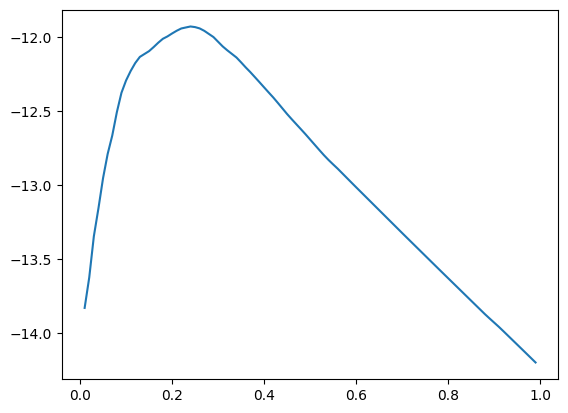

In [41]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lasso_mdl = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lasso_mdl, 
                                         X_train,
                                         y_train, 
                                         scoring=asymmetric_scorer, 
                                         cv= 3)))
    
plt.plot(alpha,error)

In [42]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
23,0.24,-11.929342


In [43]:
# Ridge regression
ridge_mdl = Ridge()

np.mean(cross_val_score(ridge_mdl, X_train, y_train, scoring=asymmetric_scorer, cv=3))

-13.305330814328945

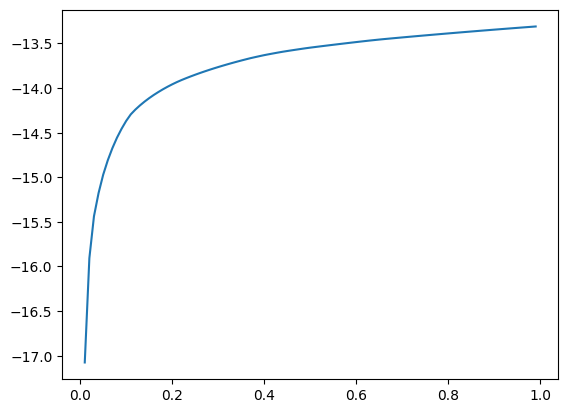

In [44]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    ridge_mdl = Ridge(alpha=(i/100))
    error.append(np.mean(cross_val_score(ridge_mdl, 
                                         X_train,
                                         y_train, 
                                         scoring=asymmetric_scorer, 
                                         cv= 3)))
    
plt.plot(alpha,error)

In [48]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-13.309174


In [46]:
# Random Forest
rf_mdl = RandomForestRegressor()

np.mean(cross_val_score(rf_mdl, X_train, y_train, scoring=asymmetric_scorer, cv=3))


-11.454191937631387

In [58]:
parameters = {'n_estimators':range(10,300,10), 
              'criterion':('squared_error','absolute_error'), 
              'max_features':(1.0, 'sqrt','log2')}

gs = GridSearchCV(rf_mdl, parameters, scoring=asymmetric_scorer, cv=3)
gs.fit(X_train,y_train)

print("Best Score:", gs.best_score_)
print("Best Parameters:", gs.best_params_)

Best Score: -10.85992593423858
Best Parameters: {'criterion': 'absolute_error', 'max_features': 1.0, 'n_estimators': 30}


In [62]:
# test on different models

# linear regression
lr_mdl.fit(X_train,y_train)
pred_lr = lr_mdl.predict(X_test)
print("Linear Regression: ", asymmetric_loss(y_test, pred_lr))
# lasso regression
lasso_mdl = Lasso(0.24)
lasso_mdl.fit(X_train,y_train)
pred_lasso = lasso_mdl.predict(X_test)
print("Lasso Regression: ", asymmetric_loss(y_test, pred_lasso))
# ridge regression
ridge_mdl = Ridge(0.99)
ridge_mdl.fit(X_train,y_train)
pred_ridge = ridge_mdl.predict(X_test)
print("Ridge Regression: ", asymmetric_loss(y_test, pred_ridge))
# random forest
pred_rf = gs.best_estimator_.predict(X_test)
print("Random Forest: ", asymmetric_loss(y_test, pred_rf))

Linear Regression:  8862644547.47538
Lasso Regression:  10.07605443560585
Ridge Regression:  10.247548692181626
Random Forest:  7.949


In [66]:
save_path = './model/rf_mae_f1_est30.pkl'

if not os.path.exists(os.path.dirname(save_path)):
    os.makedirs(os.path.dirname(save_path))
    
with open(save_path, 'wb') as file:
    pickle.dump(gs.best_estimator_, file)

In [44]:
# API testing
X_test.iloc[0,:].replace({True: 1, False: 0}).to_csv('./FlaskAPI/test_input.csv')

In [21]:
path = './FlaskAPI/models/rf_mae_f1_est30.pkl'

In [22]:
with open(path, 'rb') as file:
    model = pickle.load(file)

In [45]:
x = pd.read_csv('./FlaskAPI/test_input.csv', index_col=0)

In [49]:
model.predict(x.T)

array([80.8])